# Подсчет количеств команд в году

1. Импортируем датасет, оставляем только нужные столбцы: год и назнавание команды
2. Группируем по годам, в ячейке подставляем значение уникальных названий команд
3. Строим график зависимости количеств команд в данном году от года.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('teams_stats.csv', delimiter=',')

In [3]:
data.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [4]:
dataSelected = data.loc[:, ['Year', 'Tm']]
dataSelected.head()


,Year,Tm
0,1950.0,FTW
1,1950.0,INO
2,1950.0,CHS
3,1950.0,TOT
4,1950.0,DNN


In [5]:
my_data = dataSelected.groupby( 'Year' ).nunique()
del my_data['Year']
my_data.head()

,Tm
Year,
1950.0,18
1951.0,12
1952.0,11
1953.0,11
1954.0,10


In [6]:
my_data.reset_index(level=0, inplace=True)

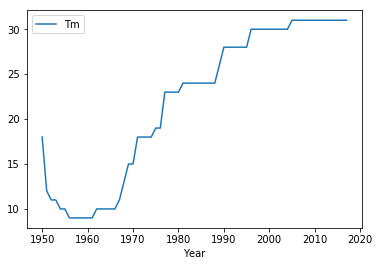

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
my_data.plot(x='Year', y='Tm')
plt.show()

# Подсчет количеств популярных горных хребтов

0. Немного не понял, каким именно образом следует поступать, но, полагаю, что задание можно выполнить разными вариантами
1. Импортируем датасет, подсчитываем количество уникальных значений нужного столбца Parent mountain
2. Переводим получившийся результат series в обрабатываемый вид.
3. Применяем построчно условие на добавление названия хребта в список, если оно встречается более 3 раз.
4. Выводим искомый список.

In [8]:
m = pd.read_csv('Mountains.csv', delimiter=',')

In [9]:
m.head()

,Rank,Mountain,Height (m),Height (ft),Prominence (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
0,1,Mount Everest / Sagarmatha / Chomolungma,8848,29029,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿,NaN,1953,>>145,121.0
1,2,K2 / Qogir / Godwin Austen,8611,28251,4017,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44.0
2,3,Kangchenjunga,8586,28169,3922,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24.0
3,4,Lhotse,8516,27940,610,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26.0
4,5,Makalu,8485,27838,2386,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,52.0


In [10]:
f = m['Parent mountain'].value_counts()
f = f.reset_index()

In [11]:
my_list = []

def ismorethree( row ):
    if row['Parent mountain'] > 3:
        my_list.append(row['index'])
f.apply(ismorethree, axis = 1)
my_list

['Mount Everest',
 'Gasherbrum I',
 'Cho Oyu',
 'Kangchenjunga',
 'Distaghil Sar',
 'K2',
 'Shisha Pangma',
 'Dhaulagiri']

In [12]:
len(my_list)

8